<center><font size="10">3804ICT/3031ICT/7031ICT Data Mining</font></center> <br>
<center><font size="8">Workshop/Lab Week 2</font></center> <br><br>
<center><font size="6">by Dr Can Wang</font></center> <br><br>

# Activity Set 1: Find solutions to the following problems [<font color=red>Individual Activity</font>]
## 1. Data Exploration
### Question Set 1 (20 mins)
<p>Suppose that the data for analysis includes the attribute age. The age values for the data tuples are (in increasing order) (13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70). Given the data, answer the following questions:<br>
<ol>
    <li>What is the mean of the data? What is the median? What is the variance? (5 mins)</li><br>
    <li>Can you find the first quartile (Q1) and the third quartile (Q3) of the data? (3 mins)</li><br>
    <li>Give the five-number summary of the data. (2 mins)</li><br>
    <li>Please use Python with neccessary libraries to validate your results of (1), (2), and (3) below. Also, use "matplotlib" to draw a box plot of the age data. (10 mins)</li><br>
</ol>
</p>

In [23]:
# import neccessary libs and load the age data in this code cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ages = np.array((13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70))
ages_df = pd.DataFrame({"Age": ages})

In [24]:
# calculate mean, median, variance values of data  in this code cell
mean = np.mean(ages)
median = np.median(ages)
variance = np.var(ages)
print(f"Mean = {mean}\nMedian = {median}\nVariance = {variance}")

Mean = 30.153846153846153
Median = 27.5
Variance = 166.5147928994083


In [25]:
# calculate Q1, Q2, Q3, and display the five-number summary of the data in this code cell
quartiles = ages_df["Age"].quantile(q=[0.25, 0.5, 0.75])
min, max = ages.min(), ages.max()
print(f"Five Number Summary:\nMin = {min}\nQ1 = {quartiles[0.25]}\nMedian = {quartiles[0.5]}\nQ3 = {quartiles[0.75]}\nMax = {max}")

Five Number Summary:
Min = 13
Q1 = 20.25
Median = 27.5
Q3 = 35.0
Max = 70


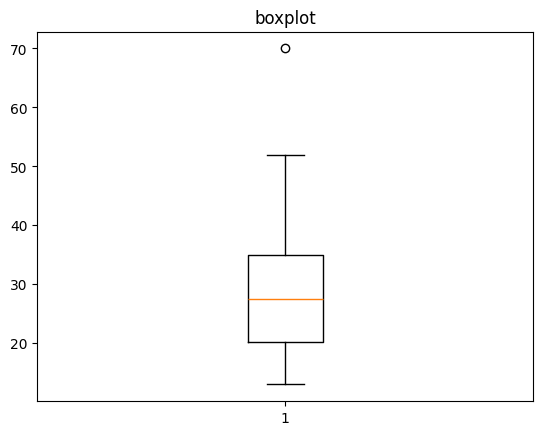

In [95]:
# use matplotlib to draw a plot box of the given data in this cell.
# more details of the drawing method can be found here:
# Documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html?highlight=boxplot#matplotlib.pyplot.boxplot
# Example: https://matplotlib.org/gallery/statistics/boxplot_demo.html
plt.boxplot(ages)
plt.title(f"boxplot")
plt.show()

### Question Set 2 (20 mins)
<p>Review the calculation method of approximated median in lecture slides (pages 10-11) and try to answer the following questions:<br>
<ol>
    <li>Why we need to approximately calculate median value of data? (2 mins)</li><br>  
    <li>Given the age data in <b>Question Set 1</b>, please calculate the approximated median value. (12 mins) <br>
        NOTE: age data can be divided into three intervals: a). $\leq 20$, b). $[21,30]$ c). $\geq 31$</li><br>
    <li>Compare the approximated median with the real median. (1 mins)</li><br>
    <li>Draw the histogram of age data with different number of bins. (5 mins)</li>
</ol>
</p>

Q1 Answer: For large datasets calculating the median can be very expensive

In [30]:
# 0-20 | 21-30 | 31-infinity
# ages = (13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70)
lower_bound = 21
N = ages.size
frequencies = [0, 0, 0]
for age in ages:
    if age <= 20:
        frequencies[0] += 1
    elif age >= 31:
        frequencies[2] += 1
    else:
        frequencies[1] += 1
lower_frequencies = frequencies[0]
median_frequency = frequencies[1]
width = 30 - 21

approx_median = lower_bound + ((N/2 - lower_frequencies)/median_frequency) * width

print(f"Approximate median = {approx_median}")

Approximate median = 28.714285714285715


(array([13.,  9.,  3.,  1.]),
 array([13.  , 27.25, 41.5 , 55.75, 70.  ]),
 <BarContainer object of 4 artists>)

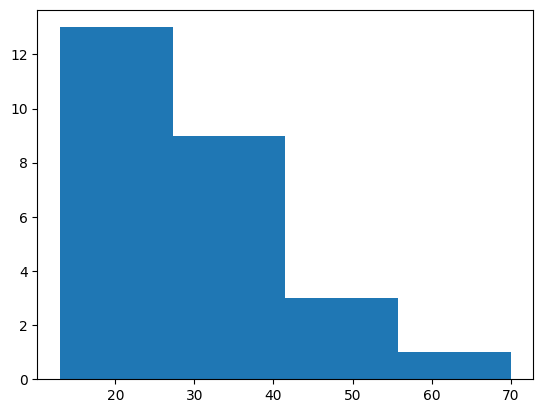

In [31]:
# use matplotlib to draw a histogram of the age data, and try to use different number of bins.
# documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
# example: https://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html
plt.hist(ages_df, 4)

### Question Set 3 (20 mins)
<p>Review the measurements dissimilarity and similarity in lecture sides (pages 34-39) and try to answer the following questions:
<br>
<ol>
    <li>Briefly describe what are similarity and dissimilarity between objects? (3 mins)</li><br>
    <li>How to represent similarity/dissimilarity among $n$ data objects? Please describe the characteristics of the representation. (3 mins)</li><br>
    <li>Give three data objects in the following table, each of which only has categorical features, calculate the dissimilarity between these objects. (5 mins) <br>
    <table style="width:80%">
      <tr><th>student_id</th><th>gender</th><th>living_region</th><th>degree</th><th>major</th><th>country</th><th>scholarship</th><th>tutor</th><th>current_yea</th></tr>      
      <tr><th>1001</th><th>M</th><th>A</th><th>bachelor</th><th>it</th><th>domestic</th><th>Y</th><th>N</th><th>1</th></tr>
<tr><th>1002</th><th>F</th><th>B</th><th>bachelor</th><th>arts</th><th>international</th><th>Y</th><th>Y</th><th>3</th></tr>
      <tr><th>1003</th><th>F</th><th>A</th><th>master</th><th>engineering</th><th>domestic</th><th>Y</th><th>Y</th><th>1</th></tr>
      <tr><th>1004</th><th>M</th><th>C</th><th>master</th><th>it</th><th>domestic</th><th>Y</th><th>N</th><th>2</th></tr>
    </table>    
    Tips: calculate dis(1001,1002), dis(1001,1003), dis(1001,1004), dis(1002,1003), dis(1002,1004), dis(1003,1004) using <b>simple match</b> method.</li><br>
    <li>Given two objects represented by the tuples (22, 1, 42, 10) and (20, 0, 36, 8), compute both the Euclidean distance and Manhattan distance between the two objects. (4 mins)</li><br>
    <li>Given five data objects in the following table, find out the neareast point in the table to the new data point $x=(1.4,1.6)$ using Euclidean distance and Manhattan distance, respectively. (5 mins)
    <table style="width:40%;border: 1px solid black;">
        <tr><th>data</th><th>$A_1$</th><th>$A_2$</th></tr>
        <tr><th>$x_1$</th><th>1.5</th><th>1.7</th></tr>
        <tr><th>$x_2$</th><th>2</th><th>1.9</th></tr>
        <tr><th>$x_3$</th><th>1.6</th><th>1.8</th></tr>
        <tr><th>$x_4$</th><th>1.2</th><th>1.5</th></tr>
        <tr><th>$x_5$</th><th>1.5</th><th>1.0</th></tr>
    </table> 
    </li><br>
</ol>
</p>

1. Similarity is a measure of how alike two data objects are, dissimilarity is a measure of how different data objects are

2. A matrix of n data points with p attributes

In [75]:
#3.
df = pd.DataFrame(
    {
        "student_id": (1001, 1002, 1003, 1004),
        "gender": ("M", "F", "F", "M"),
        "living_region": ("A", "B", "A", "C"),
        "degree": ("bachelor", "bachelor", "master", "master"),
        "major": ("it", "arts", "engineering", "it"),
        "country": ("domestic", "international", "domestic", "domestic"),
        "scholarship": ("Y", "Y", "Y", "Y"),
        "tutor": ("N", "Y", "Y", "N"),
        "current_year": (1, 3, 1, 2)
    }
)
df.set_index("student_id")

,gender,living_region,degree,major,country,scholarship,tutor,current_year
student_id,,,,,,,,
1001,M,A,bachelor,it,domestic,Y,N,1
1002,F,B,bachelor,arts,international,Y,Y,3
1003,F,A,master,engineering,domestic,Y,Y,1
1004,M,C,master,it,domestic,Y,N,2


In [76]:
#3.
def simple_match_dissimilarity(i, j, df):
    no_variables = len(df.columns)
    matches = 0
    for column in df.columns:
        if df.iloc[i][column] == df.iloc[j][column]:
            matches += 1
    return matches

def calculate_dissimilarities(df):
    dissimilarities = []
    for i in range(len(df) - 1):
        for j in range(i+1, len(df)):
            dis = simple_match_dissimilarity(i, j, df)
            dissimilarities.append(dis)
            print(f"dis({1001+i},{1001+j}) = {dis}")
    return dissimilarities

In [77]:
#3.
dis = calculate_dissimilarities(df)

dis(1001,1002) = 2
dis(1001,1003) = 4
dis(1001,1004) = 5
dis(1002,1003) = 3
dis(1002,1004) = 1
dis(1003,1004) = 3


In [83]:
#4.
import math

object1 = (22, 1, 42, 10)
object2 = (20, 0, 36, 8)
manhattan_distance = 0
euclidean_distance = 0

for i in range(len(object1)):
    manhattan_distance += abs(object1[i] - object2[i])
    euclidean_distance += pow(object1[i] - object2[i], 2)
euclidean_distance = math.sqrt(euclidean_distance)

print(f"Manhattan Distance = {manhattan_distance}")
print(f"Euclidean_Distance = {euclidean_distance}")

Manhattan Distance = 11
Euclidean_Distance = 6.708203932499369


In [98]:
#5. 
def manhattan(obj1, obj2):
    dist = 0
    for i in range(len(obj1)):
        dist += abs(obj1[i] - obj2[i])
    return dist

def euclidean(obj1, obj2):
    dist = 0
    for i in range(len(obj1)):
        dist += pow(obj1[i] - obj2[i], 2)
    dist = math.sqrt(dist)
    return dist

def find_nearest(df, point, algorithm):
    nearest = df.iloc[0]
    for i in range(1, len(df)):
        if algorithm == 0:
            if manhattan(df.iloc[i], point) < manhattan(nearest, point):
                nearest = df.iloc[i]
        else:
            if euclidean(df.iloc[i], point) < euclidean(nearest, point):
                nearest = df.iloc[i]
    return nearest

In [99]:
#5.
df = pd.DataFrame(
    {
        "A1": (1.5, 2, 1.6, 1.2, 1.5),
        "A2": (1.7, 1.9, 1.8, 1.5, 1.0)
    }
)

point = (1.4, 1.6)

print(find_nearest(df, point, 0))
print(find_nearest(df, point, 1))

A1    1.5
A2    1.7
Name: 0, dtype: float64
A1    1.5
A2    1.7
Name: 0, dtype: float64


/var/folders/vl/9w9rx2q5545bh7r3xxpffqh40000gn/T/ipykernel_38168/770662592.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dist += abs(obj1[i] - obj2[i])
/var/folders/vl/9w9rx2q5545bh7r3xxpffqh40000gn/T/ipykernel_38168/770662592.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dist += pow(obj1[i] - obj2[i], 2)


## 2. Data Pre-processing

### Question Set 4 (40 mins)
Review the Data Pre-processing in lecture sides (pages 42-74) and try to answer the following questions: 
<ol>
    <li>What are the major tasks in Data Pre-processing? (2 mins)</li><br>
    <li>In real-world data, data with missing values for some attributes is a common occurrence. Describe possible reasons and various methods for handling this problem. (2 mins)</li><br>
    <li>Given the age data in <b>Question Set 1</b> (13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70), please use smoothing by bin means to pre-process the data, using a bin depth of 3. Illustrate your steps. Comment on the effect of this technique for the given data and describe what other methods are available for data smoothing. (10 mins)</li><br>  
    <li>Discuss issues to consider during data integration. (2 mins)</li><br> 
    <li>Describe the strategies of data reduction. (4 mins)</li><br>    
    <li>What are the value ranges of the following normalization methods? (5 mins)</li>
     <ul>
        <li>min-max normalization</li>
        <li>z-score normalization</li>      
    </ul> <br>
    <li>Given the age data in <b>Question Set 1</b> (13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70), please normalize the data with min-max normalization method. (5 mins)</li><br>
    <li>Use z-score normalization to transform the value 35 for age, where the age mean is 29.96 and the standard deviation of age is 12.94 years. (2 mins)</li><br>
    <li>Suppose a group of 12 sales price records has been sorted as follows: (5,10,11,13,15,35,50,55,72,92,204,215). Partition them into three bins by equal-width and equal-depth partitioning methods. (8 mins)</li>
</ol>



1. Data cleaning, data integration, data reduction, data transformation and data discretization

2. During data collection instruments may be faulty or human/computer error may occur causing missing values. Some values may also be left blank on purpose to signify something. Missing data can be dealt with by deleting the entire object when an attribute is missing, filling in the missing values manually, or filling it in automatically through some means.

In [119]:
#3. 
bin_depth = 3
bins = []
for i in range(0, len(ages), 3):
    bin = []
    bin.append(ages[i])
    if i+1 < len(ages):
        bin.append(ages[i+1])
    if i+2 < len(ages):
        bin.append(ages[i+2])
    bins.append(bin)

smoothed = []

for bin in bins:
    avg = 0
    for value in bin:
        avg += value
    avg = avg / len(bin)
    for value in bin:
        smoothed.append(avg)

for value in smoothed:
    print(f"{value}", end=" ")

14.666666666666666 14.666666666666666 14.666666666666666 18.333333333333332 18.333333333333332 18.333333333333332 21.0 21.0 21.0 24.0 24.0 24.0 29.333333333333332 29.333333333333332 29.333333333333332 34.333333333333336 34.333333333333336 34.333333333333336 35.333333333333336 35.333333333333336 35.333333333333336 43.666666666666664 43.666666666666664 43.666666666666664 61.0 61.0 

4. Data conflicts may occur where there are discrepancies between two identical data points
   may have conflicts in units i.e metic vs imperial systems
   redundant data
   derivable data

5. - dimensionality reduction e.g. PCA, feature selection
   - Aggregation and clustering, narrowing down data to clusters
   - Sampling, choosing a subset of the data

6. - min-max normalizations: [0.0, 1.1]
   - z-score normalizatins: [-infinity, infinity]

In [126]:
#7. 

def min_max_normalize(new_min, new_max, data):
    normalized = []
    for value in data:
        normalized.append((value - np.min(data) / np.max(data) - np.min(data))*(new_max-new_min)+new_min)
    return normalized

normalized = min_max_normalize(0, 1, ages)

for i in range(len(ages)):
    print("{}".format(normalized[i]))

-0.18571428571428505
1.814285714285715
2.814285714285715
2.814285714285715
5.814285714285713
6.814285714285713
6.814285714285713
7.814285714285713
8.814285714285713
8.814285714285713
11.814285714285713
11.814285714285713
11.814285714285713
16.814285714285713
19.814285714285717
19.814285714285717
21.814285714285717
21.814285714285717
21.814285714285717
21.814285714285717
22.814285714285717
26.814285714285717
31.814285714285717
32.81428571428572
38.81428571428572
56.81428571428572


In [128]:
#8.
mean = 29.96
std = 12.94

zscore_normalized = (35-mean)/std
print(zscore_normalized)

0.38948995363214833


In [136]:
sales_price = (5,10,11,13,15,35,50,55,72,92,204,215)

def equal_width_bin(data, no_bins):
    width = (np.max(data)-np.min(data))/no_bins
    bins = []
    for i in range(no_bins):
        bin = []
        min_value = i * width
        max_value = (i+1) * width
        for price in sales_price:
            if price > min_value and price <= max_value:
                bin.append(price)
        bins.append(bin)
    return bins

print(equal_width_bin(sales_price, 3))

def equal_depth_bin(data, no_bins):
    depth = math.ceil(len(data)/no_bins)
    bins = []
    for i in range(0, len(data), depth):
        bin = []
        for j in range(depth):
            bin.append(data[i+j])
        bins.append(bin)
    return bins
            
print(equal_depth_bin(sales_price, 3))

[[5, 10, 11, 13, 15, 35, 50, 55], [72, 92], [204]]
[[5, 10, 11, 13], [15, 35, 50, 55], [72, 92, 204, 215]]


# Activity Set 2: Coding Practice (extras for homework) [<font color=red>Individual Activity</font>] 

You need to code to address the following problems:
<ol>
    <li>Load raw_bank_data.csv dataset.</li>
    <li>Check what types of attributes are available in the data.</li>
    <li>Check statistical information of numerical attributes.</li>
    <li>Check if there are missing data and noise for attributes.</li>
    <li>Choose mean or median values to fill the missing data.</li>
    <li>Drop those data records whose last column ("y") is missing.</li> 
    <li>Need to drop two columns "day" and "month".</li>
    <li>Normalize the categorical features using one-hot method.</li>   <font color=green>  
    <b>Below tasks are optional activities for 3031ICT/7031ICT students:   
    <li>Use K-NN as a classifier to predict if the customer is going to have a deposit.</li>
    <li>Normalize the data using min-max scale and then perform the K-NN above again.</li>     
</ol>